## Stochastic Gradient Descent


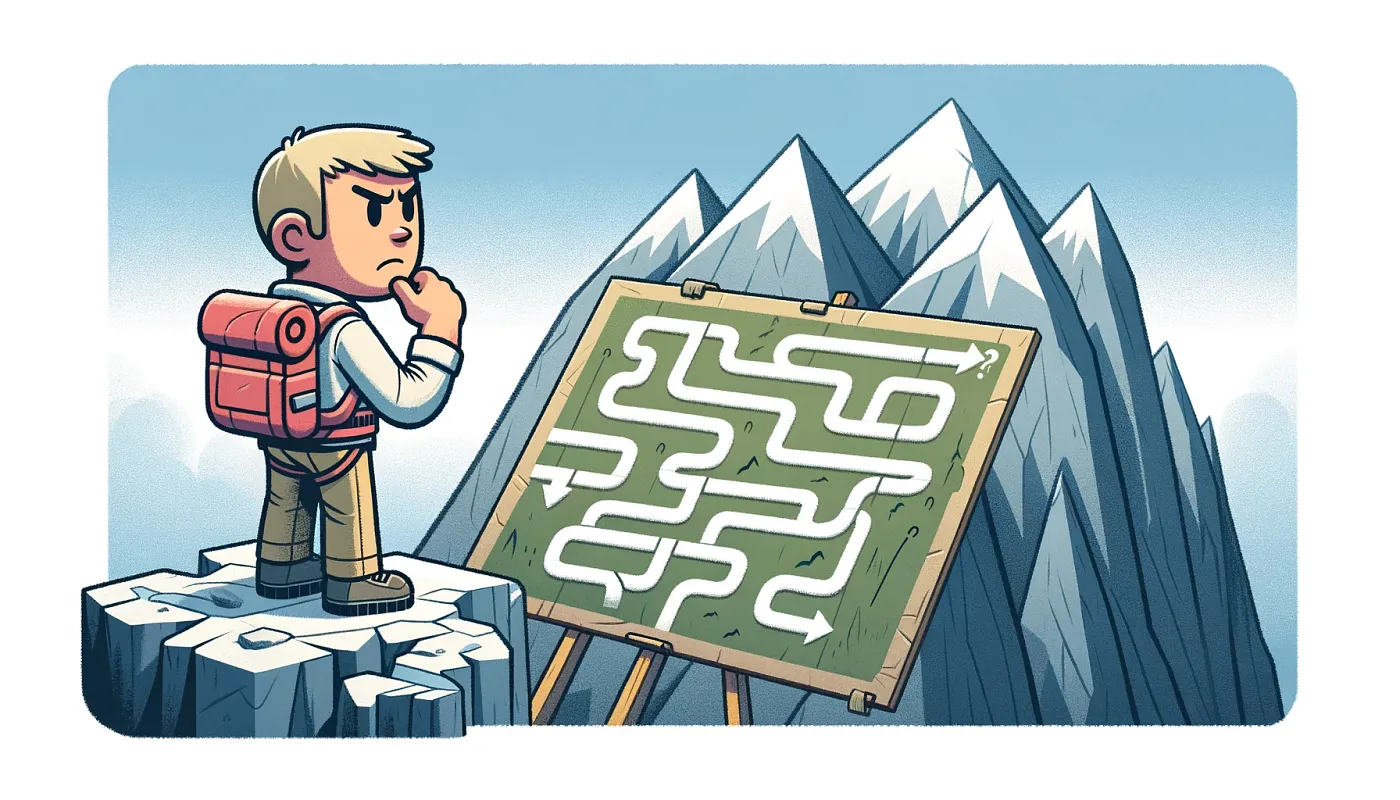

In machine learning , Gradient Descent is a an optimization algorithm used to minimize a function by iteratively moving towards the steepest descent as defined by the negative of the gradient. Here’s how it works, you start with a random point on the function you’re trying to minimize, for example a random starting point on the mountain. Then, you calculate the gradient (slope) of the function at that point. In the mountain analogy, this is like looking around you to find the steepest slope. Once you know the direction, you take a step downhill in that direction, and then you calculate the gradient again. Repeat this process until you reach the bottom. The size of each step is determined by the learning rate. However, if the learning rate is too small, it might take a long time to reach the bottom. If it’s too large, you might overshoot the lowest point. Finding the right balance is key.

### The ‘Stochastic’ in Stochastic Gradient Descent
Stochastic Gradient Descent (SGD) adds a twist to the traditional gradient descent approach. The term ‘stochastic’ refers to a system or process that is linked with a random probability. 

In traditional batch gradient descent, you calculate the gradient of the loss function with respect to the parameters for the entire training set. As you can imagine, for large datasets, this can be quite computationally intensive and time-consuming. This is where SGD comes into play. Instead of using the entire dataset to calculate the gradient, SGD randomly selects just one data point (or a few data points) to compute the gradient in each iteration.

Think of this process as if you were again descending a mountain, but this time in thick fog with limited visibility. Rather than viewing the entire landscape to decide your next step, you make your decision based on where your foot lands next. This step is small and random, but it’s repeated many times, each time adjusting your path slightly in response to the immediate terrain under your feet.

### Steps in SGD

#### Initialization (Step 1)
First, you initialize the parameters (weights) of your model. This can be done randomly or by some other initialization technique. The starting point for SGD is crucial as it influences the path the algorithm will take.

#### Random Selection (Step 2)
In each iteration of the training process, SGD randomly selects a single data point (or a small batch of data points) from the entire dataset. This randomness is what makes it ‘stochastic’.

#### Compute the Gradient (Step 3)
Calculate the gradient of the loss function, but only for the randomly selected data point(s). The gradient is a vector that points in the direction of the steepest increase of the loss function. In the context of SGD, it tells you how to tweak the parameters to make the model more accurate for that particular data point.


$$
\nabla_{\theta} J(\theta) = \frac{\partial J(\theta)}{\partial \theta}
$$

- $\nabla_{\theta} J(\theta)$: This represents the gradient of the function $J(\theta)$ with respect to the parameter $\theta$.
- $\frac{\partial J(\theta)}{\partial \theta}$: This is the partial derivative of the function $J(\theta)$ with respect to $\theta$.

In essence, the gradient $\nabla_{\theta} J(\theta)$ is a vector of partial derivatives, which indicates the direction and rate of the fastest increase of the function $J(\theta)$. This iteratively adjust $\theta$ to minimize $J(\theta)$.

#### Update the Parameters (Step 4)
Adjust the model parameters in the opposite direction of the gradient. Here’s where the learning rate η plays a crucial role. The formula for updating each parameter is:

$$
\theta_{\text{new}} = \theta_{\text{old}} - \eta \cdot \nabla_{\theta} J(\theta)
$$

This equation represents one iteration of the gradient descent algorithm, which is used to minimize a function $J(\theta)$. 

- $\theta_{\text{new}}$: The updated value of the parameter $\theta$ after one iteration of gradient descent.
- $\theta_{\text{old}}$: The current value of the parameter $\theta$.
- $\eta$: The learning rate, a positive scalar that controls the step size of each iteration. It determines how much $\theta$ is adjusted in each step.
- $\nabla_{\theta} J(\theta)$: The gradient of the function $J(\theta)$ with respect to $\theta$, which indicates the direction and rate of the steepest increase of the function.

In the context of minimizing $J(\theta)$, the gradient descent algorithm updates the parameter $\theta$ by moving it in the opposite direction of the gradient. This process is repeated iteratively to find the value of $\theta$ that minimizes $J(\theta)$.

The learning rate determines the size of the steps you take towards the minimum. If it’s too small, the algorithm will be slow; if it’s too large, you might overshoot the minimum.

#### Repeat until convergence (Step 5)
Repeat steps 2 to 4 for a set number of iterations or until the model performance stops improving. Each iteration provides a slightly updated model.
Ideally, after many iterations, SGD converges to a set of parameters that minimize the loss function, although due to its stochastic nature, the path to convergence is not as smooth and may oscillate around the minimum.

## Understanding Learning Rate
One of the most crucial hyperparameters in the Stochastic Gradient Descent (SGD) algorithm is the learning rate. This parameter can significantly impact the performance and convergence of the model. Understanding and choosing the right learning rate is a vital step in effectively employing SGD.

#### What is Learning Rate?
At this point you should have an idea of what learning rate is, but let’s better define it for clarity. The learning rate in SGD determines the size of the steps the algorithm takes towards the minimum of the loss function. It’s a scalar that scales the gradient, dictating how much the weights in the model should be adjusted during each update. If you visualize the loss function as a valley, the learning rate decides how big a step you take with each iteration as you walk down the valley.

#### Too High Learning Rate
If the learning rate is too high, the steps taken might be too large. This can lead to overshooting the minimum, causing the algorithm to diverge or oscillate wildly without finding a stable point.
Think of it as taking leaps in the valley and possibly jumping over the lowest point back and forth.

#### Too Low Learning Rate
On the other hand, a very low learning rate leads to extremely small steps. While this might sound safe, it significantly slows down the convergence process.
In a worst-case scenario, the algorithm might get stuck in a local minimum or even stop improving before reaching the minimum.
Imagine moving so slowly down the valley that you either get stuck or it takes an impractically long time to reach the bottom.

#### Finding the Right Balance
The ideal learning rate is neither too high nor too low but strikes a balance, allowing the algorithm to converge efficiently to the global minimum.
Typically, the learning rate is chosen through experimentation and is often set to decrease over time. This approach is called learning rate annealing or scheduling.

#### Learning Rate Scheduling
Learning rate scheduling involves adjusting the learning rate over time. Common strategies include:

- Time-Based Decay: The learning rate decreases over each update.
- Step Decay: Reduce the learning rate by some factor after a certain number of epochs.
- Exponential Decay: Decrease the learning rate exponentially.
- Adaptive Learning Rate: Methods like AdaGrad, RMSProp, and Adam adjust the learning rate automatically during training.

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd

# Load Data
from sklearn.datasets import load_diabetes

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Model Fine Tuning
import optuna

# Filter Warnings
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'numpy'

## **SGD Regressor Class**

In [ ]:
class SGDRegressor:
    def __init__(self, learning_rate=0.01, epochs=100, batch_size=1, reg=None, reg_param=0.0):
        """
        Constructor for the SGDRegressor.

        Parameters:
        learning_rate (float): The step size used in each update.
        epochs (int): Number of passes over the training dataset.
        batch_size (int): Number of samples to be used in each batch.
        reg (str): Type of regularization ('l1' or 'l2'); None if no regularization.
        reg_param (float): Regularization parameter.

        The weights and bias are initialized as None and will be set during the fit method.
        """
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.reg = reg
        self.reg_param = reg_param
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        """
        Fits the SGDRegressor to the training data.

        Parameters:
        X (numpy.ndarray): Training data, shape (m_samples, n_features).
        y (numpy.ndarray): Target values, shape (m_samples,).

        This method initializes the weights and bias, and then updates them over a number of epochs.
        """
        m, n = X.shape  # m is number of samples, n is number of features
        self.weights = np.zeros(n)
        self.bias = 0

        for _ in range(self.epochs):
            indices = np.random.permutation(m)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            for i in range(0, m, self.batch_size):
                X_batch = X_shuffled[i:i+self.batch_size]
                y_batch = y_shuffled[i:i+self.batch_size]

                gradient_w = -2 * np.dot(X_batch.T, (y_batch - np.dot(X_batch, self.weights) - self.bias)) / self.batch_size
                gradient_b = -2 * np.sum(y_batch - np.dot(X_batch, self.weights) - self.bias) / self.batch_size

                if self.reg == 'l1':
                    gradient_w += self.reg_param * np.sign(self.weights)
                elif self.reg == 'l2':
                    gradient_w += self.reg_param * self.weights

                self.weights -= self.learning_rate * gradient_w
                self.bias -= self.learning_rate * gradient_b

    def predict(self, X):
        """
        Predicts the target values using the linear model.

        Parameters:
        X (numpy.ndarray): Data for which to predict target values.

        Returns:
        numpy.ndarray: Predicted target values.
        """
        return np.dot(X, self.weights) + self.bias

    def compute_loss(self, X, y):
        """
        Computes the loss of the model.

        Parameters:
        X (numpy.ndarray): The input data.
        y (numpy.ndarray): The true target values.

        Returns:
        float: The computed loss value.
        """
        return (np.mean((y - self.predict(X)) ** 2) + self._get_regularization_loss()) ** 0.5

    def _get_regularization_loss(self):
        """
        Computes the regularization loss based on the regularization type.

        Returns:
        float: The regularization loss.
        """
        if self.reg == 'l1':
            return self.reg_param * np.sum(np.abs(self.weights))
        elif self.reg == 'l2':
            return self.reg_param * np.sum(self.weights ** 2)
        else:
            return 0

    def get_weights(self):
        """
        Returns the weights of the model.

        Returns:
        numpy.ndarray: The weights of the linear model.
        """
        return self.weights

## **Load Diabetes Data**

In [ ]:
# Load the diabetes dataset
diabetes = load_diabetes()
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
df.head()

In [ ]:
# Create histograms for each feature
df.hist(bins=10, figsize=(20, 15))
plt.tight_layout()
plt.show()

In [ ]:
# Pairplot of the features
sns.pairplot(df)

## **Split Data**

In [ ]:
# Get the input features (X) and target values (y)
X = diabetes.data
y = diabetes.target

# Split the dataset into training and test sets
def split_dataset(X, y, test_ratio=0.2):
    indices = np.random.permutation(len(X))
    test_size = int(len(X) * test_ratio)
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

X_train, X_test, y_train, y_test = split_dataset(X, y)
X_train, X_val, y_train, y_val = split_dataset(X_train, y_train)

## **Fine-Tune Model with Optuna**

In [ ]:
def objective(trial):
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
    epochs = trial.suggest_int('epochs', 30, 250)
    batch_size = trial.suggest_categorical('batch_size', [1, 10, 50, 100])
    reg_param = trial.suggest_loguniform('reg_param', 1e-5, 1e-1)
    reg = trial.suggest_categorical('reg', ['l1', 'l2'])

    regressor = SGDRegressor(learning_rate=learning_rate, epochs=epochs, batch_size=batch_size, reg=reg, reg_param=reg_param)
    regressor.fit(X_train, y_train)

    # Compute the validation loss
    val_loss = regressor.compute_loss(X_val, y_val)

    return val_loss

optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

best_params = study.best_params

In [ ]:
for key, value in best_params.items():
    if key == 'reg':
        print(f'{key.capitalize()}: {value.capitalize()}')
    else:
        print(f'{key.capitalize()}: {value:.3f}')

## **Predict Data**

In [ ]:
best_regressor = SGDRegressor(learning_rate=best_params['learning_rate'], epochs=best_params['epochs'], batch_size=best_params['batch_size'], reg='l1', reg_param=best_params['reg_param'])
best_regressor.fit(X_train, y_train)
predictions = best_regressor.predict(X_test)
loss = best_regressor.compute_loss(X_test, y_test)
print(f"Best model loss on test data: {loss:.2f}")